In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import re
from pathlib import Path

In [2]:
# Visualization tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
!pip install datasets transformers seqeval

In [4]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.7 MB/s eta 0:00:00


In [5]:
# Text and emoji processing
import emoji

In [6]:
# Machine learning tools
from sklearn.metrics import classification_report, roc_curve, auc

In [7]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.3 MB/s eta 0:00:00


In [8]:
import nltk
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
! unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [9]:
import os
import string
import json
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [10]:
splits = {'train': 'simplified/train-00000-of-00001.parquet', 'validation': 'simplified/validation-00000-of-00001.parquet', 'test': 'simplified/test-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/google-research-datasets/go_emotions/" + splits["train"])
df_valid = pd.read_parquet("hf://datasets/google-research-datasets/go_emotions/" + splits["validation"])
df_test = pd.read_parquet("hf://datasets/google-research-datasets/go_emotions/" + splits["test"])

In [11]:
df_train = pd.DataFrame(df_train)
df_valid = pd.DataFrame(df_valid)
df_test = pd.DataFrame(df_test)

In [ ]:
df_train.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [ ]:
df_test.head()

,text,labels,id
0,I’m really sorry about your situation :( Altho...,[25],eecwqtt
1,It's wonderful because it's awful. At not with.,[0],ed5f85d
2,"Kings fan here, good luck to you guys! Will be...",[13],een27c3
3,"I didn't know that, thank you for teaching me ...",[15],eelgwd1
4,They got bored from haunting earth for thousan...,[27],eem5uti


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
with open('/content/drive/MyDrive/GoEmotions/ekman_mapping.json') as file:
    ekman_mapping = json.load(file)

In [14]:
ekman_mapping

{'anger': ['anger', 'annoyance', 'disapproval'],
 'disgust': ['disgust'],
 'fear': ['fear', 'nervousness'],
 'joy': ['joy',
  'amusement',
  'approval',
  'excitement',
  'gratitude',
  'love',
  'optimism',
  'relief',
  'pride',
  'admiration',
  'desire',
  'caring'],
 'sadness': ['sadness', 'disappointment', 'embarrassment', 'grief', 'remorse'],
 'surprise': ['surprise', 'realization', 'confusion', 'curiosity']}

In [15]:
emotion_file = open("/content/drive/MyDrive/GoEmotions/emotions.txt", "r")
emotion_list = emotion_file.read()
emotion_list = emotion_list.split("\n")
print(emotion_list)

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [16]:
def idx2class(idx_list):
    arr = []
    for i in idx_list:
        arr.append(emotion_list[int(i)])
    return arr

In [17]:
df_train['emotions'] = df_train['labels'].apply(idx2class)
df_valid['emotions'] = df_valid['labels'].apply(idx2class)
df_test['emotions'] = df_test['labels'].apply(idx2class)

In [ ]:
df_train

,text,labels,id,emotions
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger]
3,To make her feel threatened,[14],ed7ypvh,[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance]
...,...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,[18],edsb738,[love]
43406,Always thought that was funny but is it a refe...,[6],ee7fdou,[confusion]
43407,What are you talking about? Anything bad that ...,[3],efgbhks,[annoyance]
43408,"More like a baptism, with sexy results!",[13],ed1naf8,[excitement]


In [18]:
def emotion_mapping(emotion_list):
    map_list = []

    for i in emotion_list:
        if i in ekman_mapping['anger']:
            map_list.append('anger')
        if i in ekman_mapping['disgust']:
            map_list.append('disgust')
        if i in ekman_mapping['fear']:
            map_list.append('fear')
        if i in ekman_mapping['joy']:
            map_list.append('joy')
        if i in ekman_mapping['sadness']:
            map_list.append('sadness')
        if i in ekman_mapping['surprise']:
            map_list.append('surprise')
        if i == 'neutral':
            map_list.append('neutral')

    return map_list

In [19]:
df_train['mapped emotions'] = df_train['emotions'].apply(emotion_mapping)
df_valid['mapped emotions'] = df_valid['emotions'].apply(emotion_mapping)
df_test['mapped emotions'] = df_test['emotions'].apply(emotion_mapping)

In [ ]:
df_train

,text,labels,id,emotions,mapped emotions
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral],[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral],[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger],[anger]
3,To make her feel threatened,[14],ed7ypvh,[fear],[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance],[anger]
...,...,...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,[18],edsb738,[love],[joy]
43406,Always thought that was funny but is it a refe...,[6],ee7fdou,[confusion],[surprise]
43407,What are you talking about? Anything bad that ...,[3],efgbhks,[annoyance],[anger]
43408,"More like a baptism, with sexy results!",[13],ed1naf8,[excitement],[joy]


In [20]:
df_train['anger'] = np.zeros((len(df_train),1))
df_train['disgust'] = np.zeros((len(df_train),1))
df_train['fear'] = np.zeros((len(df_train),1))
df_train['joy'] = np.zeros((len(df_train),1))
df_train['sadness'] = np.zeros((len(df_train),1))
df_train['surprise'] = np.zeros((len(df_train),1))
df_train['neutral'] = np.zeros((len(df_train),1))

df_valid['anger'] = np.zeros((len(df_valid),1))
df_valid['disgust'] = np.zeros((len(df_valid),1))
df_valid['fear'] = np.zeros((len(df_valid),1))
df_valid['joy'] = np.zeros((len(df_valid),1))
df_valid['sadness'] = np.zeros((len(df_valid),1))
df_valid['surprise'] = np.zeros((len(df_valid),1))
df_valid['neutral'] = np.zeros((len(df_valid),1))

df_test['anger'] = np.zeros((len(df_test),1))
df_test['disgust'] = np.zeros((len(df_test),1))
df_test['fear'] = np.zeros((len(df_test),1))
df_test['joy'] = np.zeros((len(df_test),1))
df_test['sadness'] = np.zeros((len(df_test),1))
df_test['surprise'] = np.zeros((len(df_test),1))
df_test['neutral'] = np.zeros((len(df_test),1))

In [21]:
for i in ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise','neutral']:
    df_train[i] = df_train['mapped emotions'].apply(lambda x: 1 if i in x else 0)
    df_valid[i] = df_valid['mapped emotions'].apply(lambda x: 1 if i in x else 0)
    df_test[i] = df_test['mapped emotions'].apply(lambda x: 1 if i in x else 0)

In [ ]:
df_train.head()

,text,labels,id,emotions,mapped emotions,anger,disgust,fear,joy,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral],[neutral],0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral],[neutral],0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger],[anger],1,0,0,0,0,0,0
3,To make her feel threatened,[14],ed7ypvh,[fear],[fear],0,0,1,0,0,0,0
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance],[anger],1,0,0,0,0,0,0


In [22]:
df_train.drop(["labels", "id", "emotions", "mapped emotions", "neutral"], axis=1, inplace=True)
df_valid.drop(["labels", "id", "emotions", "mapped emotions", "neutral"], axis=1, inplace=True)
df_test.drop(["labels", "id", "emotions", "mapped emotions", "neutral"], axis=1, inplace=True)

In [ ]:
df_train.head()

,text,anger,disgust,fear,joy,sadness,surprise
0,My favourite food is anything I didn't have to...,0,0,0,0,0,0
1,"Now if he does off himself, everyone will thin...",0,0,0,0,0,0
2,WHY THE FUCK IS BAYLESS ISOING,1,0,0,0,0,0
3,To make her feel threatened,0,0,1,0,0,0
4,Dirty Southern Wankers,1,0,0,0,0,0


In [23]:
# Precompile regular expressions
EMOJIS = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
EMOJI_PATTERN = re.compile('|'.join(re.escape(u) for u in EMOJIS))
MULTI_EMOJI_PATTERN = re.compile(r"({})\1+".format(EMOJI_PATTERN.pattern))
REPEATED_CHAR_PATTERN = re.compile(r'(.)\1{2,}')

emoticon_dict = {
    ':)': '<smile_face>',
    ':-)': '<smile_face>',
    ':(': '<sad_face>',
    ':-(': '<sad_face>',
    ':D': '<big_smile>',
    ';)': '<wink>',
    ':-P': '<tongue_out>',
    ':/': '<unsure_face>',
    '<3': '<heart>',
    '¯_(ツ)_/¯': '<shrug>',
}

In [24]:
def preprocess_text(text):
    # Replace sequences of the same emoji with a single emoji
    text = MULTI_EMOJI_PATTERN.sub(r"\1", text)

    # Limit repeated characters to three repetitions
    text = REPEATED_CHAR_PATTERN.sub(r'\1\1\1', text)

    # Replace user mentions with a special token
    text = re.sub(r'u/\w+', '<user>', text)

    # Replace subreddit mentions with a special token
    # text = re.sub(r'r/\w+', '<subreddit>', text)

    # Replace prices
    text = re.sub(r'\$\d{1,3}(,\d{3})*(\.\d+)?', '<PRICE>', text)

    # Replace times
    text = re.sub(r'\b\d{1,2}:\d{2}(:\d{2})?\b', '<TIME>', text)

    # Replace numbers except 1 or 2 digit integers
    text = re.sub(r'\d{1,3}(,\d{3})*(\.\d+)?|\d+(\.\d+)?',
                  lambda m: '<NUM>' if len(m.group(0))>2 else m.group(0), text)

    for emoticon, name in emoticon_dict.items():
        text = text.replace(emoticon, name)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [25]:
df_train['text'] = df_train['text'].apply(preprocess_text)
df_valid['text'] = df_valid['text'].apply(preprocess_text)
df_test['text'] = df_test['text'].apply(preprocess_text)

In [26]:
def preprocess(sentence):
    sentence = sentence.lower()
    stop_words = set(stopwords.words('english'))
    # initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    sentence = re.sub('[^A-z]', ' ', sentence)
    negative = ['not', 'neither', 'nor', 'but', 'however', 'although', 'nonetheless', 'despite', 'except', 'even though', 'yet']
    stop_words = [z for z in stop_words if z not in negative]
    #lemmatization
    preprocessed_tokens = [lemmatizer.lemmatize(contractions.fix(temp.lower())) for temp in sentence.split() if temp not in stop_words]
    return ' '.join([x for x in preprocessed_tokens]).strip()

def text_preprocessing_pipeline(text):
    text = preprocess(text)
    return text

In [27]:
df_train['text'] = df_train['text'].apply(lambda x: preprocess(x))

In [28]:
df_valid["text"] = df_valid["text"].apply(lambda x: preprocess(x))

In [29]:
df_test["text"] = df_test["text"].apply(text_preprocessing_pipeline)

In [ ]:
pd.Series(df_train["text"]).str.split().str.len().describe(percentiles=[0.05, 0.97])

count    43410.000000
mean         6.735361
std          3.640652
min          0.000000
5%           2.000000
50%          6.000000
97%         14.000000
max        102.000000
Name: text, dtype: float64

In [31]:
df_train.head()

,text,anger,disgust,fear,joy,sadness,surprise
0,favourite food anything cook,0,0,0,0,0,0
1,everyone think he laugh screwing people instea...,0,0,0,0,0,0
2,fuck bayless isoing,1,0,0,0,0,0
3,make feel threatened,0,0,1,0,0,0
4,dirty southern wanker,1,0,0,0,0,0


In [ ]:
df_test.head()

,text,anger,disgust,fear,joy,sadness,surprise
0,really sorry situation sad_face although love ...,0,0,0,0,1,0
1,wonderful awful not,0,0,0,1,0,0
2,king fan good luck guy interesting game watch,0,0,0,1,0,0
3,know thank teaching something today,0,0,0,1,0,0
4,got bored haunting earth thousand year ultimat...,0,0,0,0,0,0


In [ ]:
df_valid.head()

,text,anger,disgust,fear,joy,sadness,surprise
0,new orleans really feel like new orleans,0,0,0,0,0,0
1,know answer man programmed capture code send a...,0,0,0,1,0,0
2,never sad life,0,0,0,0,1,0
3,economy heavily controlled subsidized governme...,0,0,0,1,0,0
4,could easily taken real camera legitimate sour...,0,0,0,1,0,0


In [ ]:
for col in df_train.columns[1:]:
    print(f"{col}:\n",df_train[col].value_counts())
    print("\n")

anger:
 anger
0    37831
1     5579
Name: count, dtype: int64


disgust:
 disgust
0    42617
1      793
Name: count, dtype: int64


fear:
 fear
0    42684
1      726
Name: count, dtype: int64


joy:
 joy
0    26000
1    17410
Name: count, dtype: int64


sadness:
 sadness
0    40147
1     3263
Name: count, dtype: int64


surprise:
 surprise
0    38043
1     5367
Name: count, dtype: int64




# Data Inspection and Exploratory Analysis
Label Distribution Visualization

---



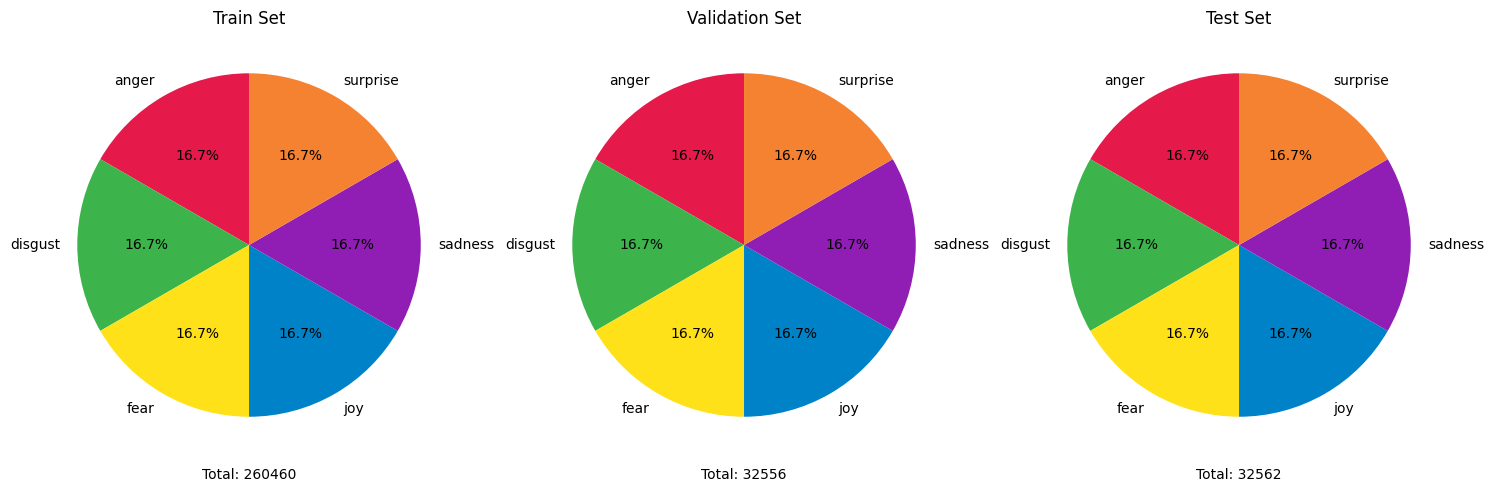

In [ ]:
# Define a color map for each label
colors = {
    'anger': '#e6194b',
    'disgust': '#3cb44b',
    'fear': '#ffe119',
    'joy': '#0082c8',
    'sadness': '#911eb4',
    'surprise': '#f58231',
}

# Function to compute label counts for multi-label data
def compute_label_counts(ds):
    return ds.drop(columns=['text']).count(axis=0)

# Get the counts of each label in each set
train_counts = compute_label_counts(df_train)
val_counts = compute_label_counts(df_valid)
test_counts = compute_label_counts(df_test)

# Generate the pie charts
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

datasets = [
    (train_counts, "Train Set"),
    (val_counts, "Validation Set"),
    (test_counts, "Test Set")
]

for i, (counts, title) in enumerate(datasets):
    labels = counts.index
    sizes = counts.values
    colors_list = [colors[label] for label in labels]
    axs[i].pie(sizes, labels=labels, colors=colors_list, autopct='%1.1f%%', startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(title)
    axs[i].text(0.5, -0.05, f'Total: {int(sum(sizes))}', size=10, ha='center', transform=axs[i].transAxes)

plt.tight_layout()
plt.show()

In [ ]:
emotions = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']

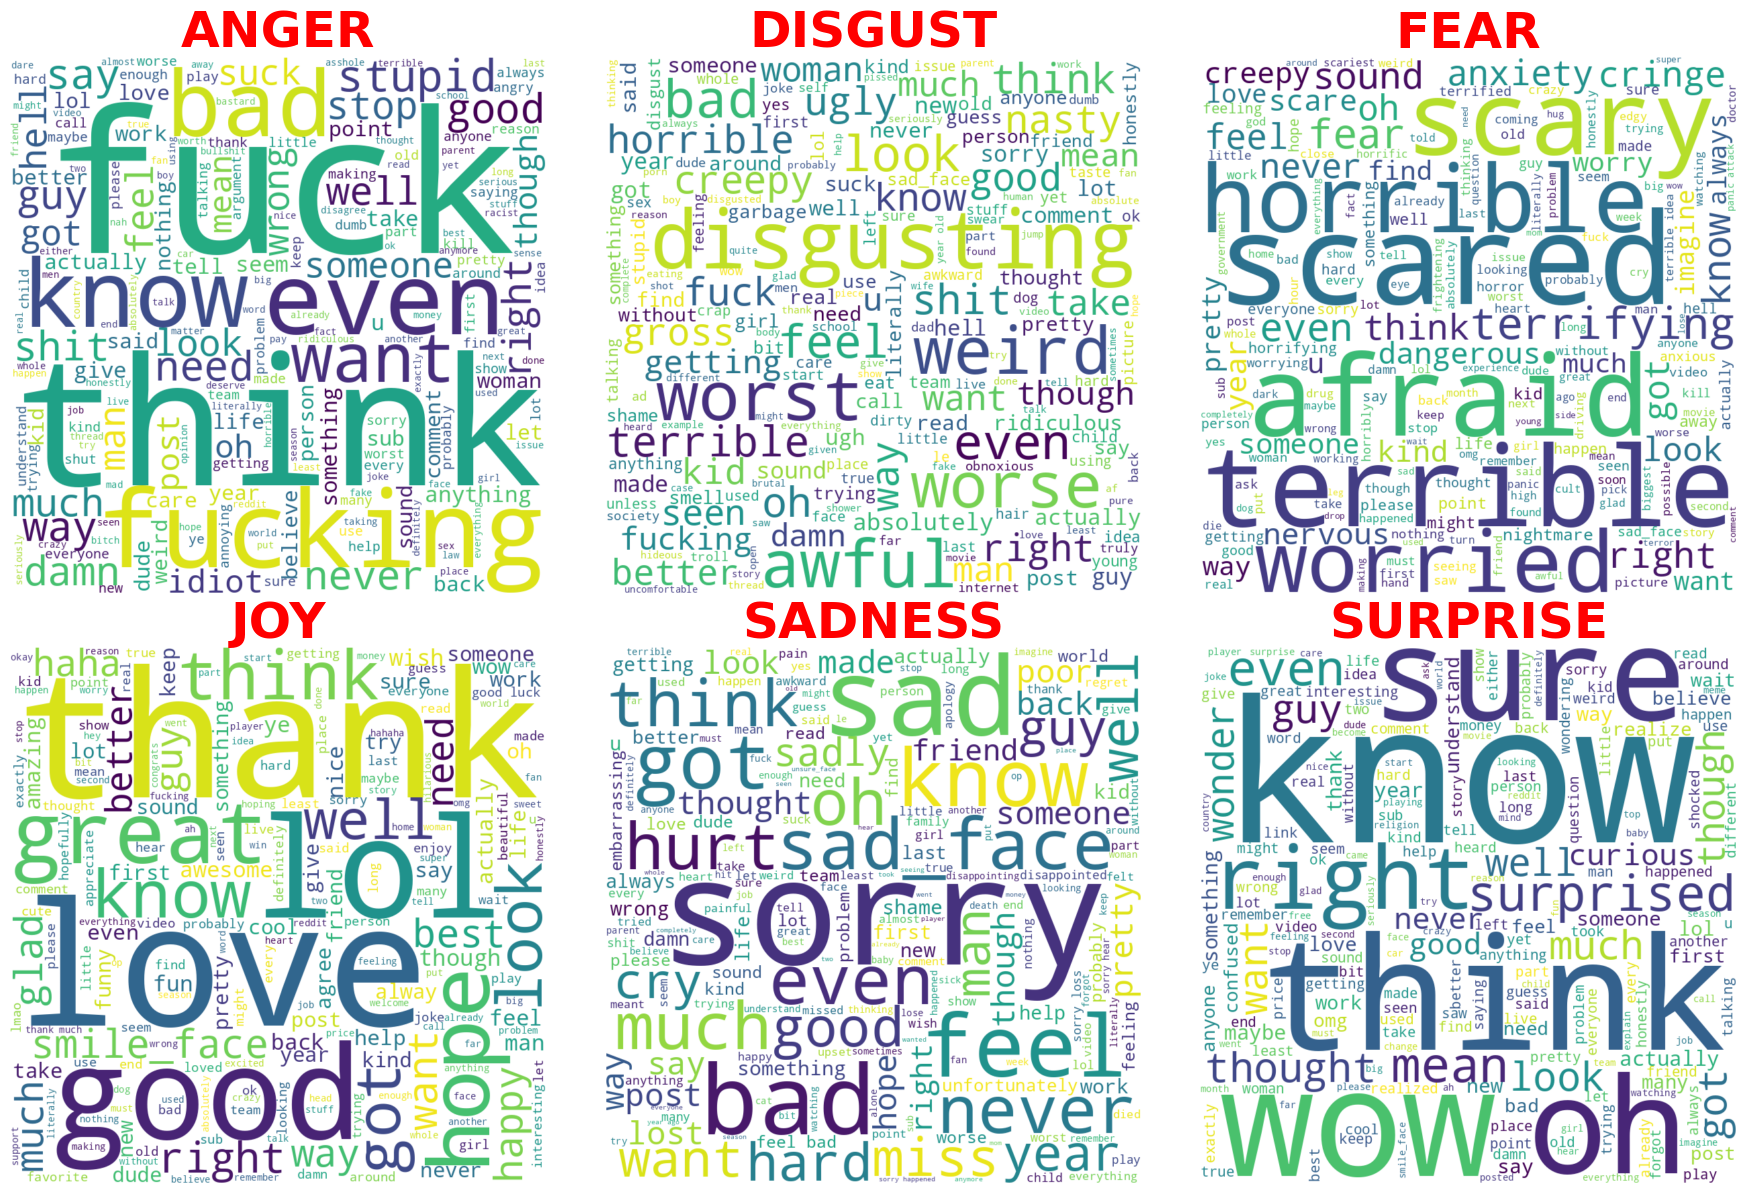

In [ ]:
stopwords = set(STOPWORDS)
other_words = ['Name', 'num', 'people', 'really', 'today', 'tomorrow', 'tonight', 'night', 'day', 'go', 'will',
               's', 'may', 'see','come', 'going', 'game', '1st', '2nd', '3rd', '4th', 'Im', 'one', 'time', 'hate',
               'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'watch', 'make', 'thing',
              'still', 'yeah']
stopwords.update(other_words)

# Given the multi-label nature, we need to iterate over each emotion column to get the text associated with it.
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2x3 grid of plots

for i, emotion in enumerate(emotions):
    ax = axes[i//3, i%3]

    # Filter out comments with the current emotion label
    emotion_comments = df_train[df_train[emotion] == 1]['text']

    # Concatenate all comments for the current emotion
    all_text = ' '.join(emotion_comments)

    # Generate word cloud
    wordcloud = WordCloud(stopwords=stopwords, width=800, height=800,
                          background_color='white', min_font_size=10).generate(all_text)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(emotion.upper(), fontsize=36, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

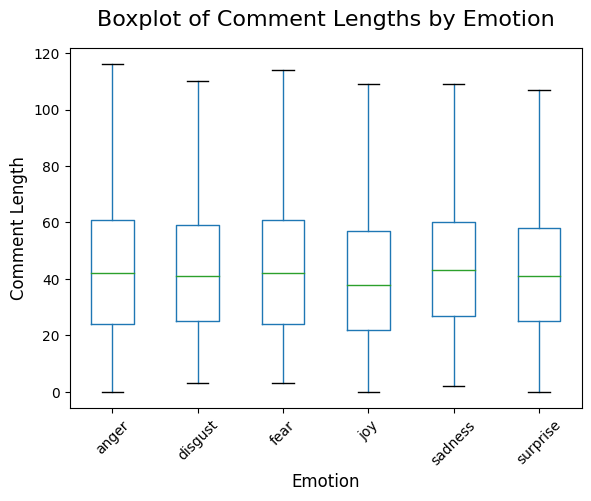

In [ ]:
# Melt the DataFrame to long format
melted_df = df_train.melt(id_vars=['text'],  # Remove 'new_length' as it's not in the DataFrame
                    value_vars=emotions,
                    var_name='emotion',
                    value_name='label_value')

# Filter rows where the label is 1
filtered_df = melted_df[melted_df['label_value'] == 1]

# Calculate the length of each comment
filtered_df['text_length'] = filtered_df['text'].apply(len)

# Plot boxplot using the new 'text_length' column
ax = filtered_df.boxplot(column='text_length', by='emotion', grid=False, showfliers=False)

plt.suptitle('Boxplot of Comment Lengths by Emotion', fontsize=16)
plt.title('')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Comment Length', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Save DataFrames to CSV
df_train.to_csv('/content/drive/My Drive/FinalDataframes/df_train.csv', index=False)
df_valid.to_csv('/content/drive/My Drive/FinalDataframes/df_valid.csv', index=False)
df_test.to_csv('/content/drive/My Drive/FinalDataframes/df_test.csv', index=False)

# Baseline: Classic Machine Learning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
df_train.head()

,text,anger,disgust,fear,joy,sadness,surprise
0,favourite food anything cook,0,0,0,0,0,0
1,everyone think he laugh screwing people instea...,0,0,0,0,0,0
2,fuck bayless isoing,1,0,0,0,0,0
3,make feel threatened,0,0,1,0,0,0
4,dirty southern wanker,1,0,0,0,0,0


In [ ]:
df_train.shape

(43410, 7)

In [ ]:
X_train = df_train['text']
y_train = df_train[emotions]
X_valid = df_valid['text']
y_valid = df_valid[emotions]
X_test = df_test['text']
y_test = df_test[emotions]

In [ ]:
X_train.head()

0                         favourite food anything cook
1    everyone think he laugh screwing people instea...
2                                  fuck bayless isoing
3                                 make feel threatened
4                                dirty southern wanker
Name: text, dtype: object

In [ ]:
# Tokenization and TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
y_train = y_train.values
y_valid = y_valid.values
y_test = y_test.values

In [ ]:
y_train

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]])

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
class_weight_dict = {}
for i, emotion in enumerate(emotions):
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train[:, i]), y=y_train[:, i]) # Calculate class weights for each emotion separately
    class_weight_dict[emotion] = {i: weight for i, weight in enumerate(class_weights)}

# Create a list of class weights for each emotion
class_weights = [class_weight_dict[emotion] for emotion in emotions]

# Use a list comprehension to create a list of SVC instances with separate class weights for each emotion
estimators = [SVC(kernel='linear', class_weight=class_weights[i]) for i in range(len(emotions))]

# Create a OneVsRestClassifier with the list of estimators
# Older versions of scikit-learn use estimator= not estimators=
model = OneVsRestClassifier(estimator=SVC(kernel='linear')) # Pass a single estimator
model.fit(X_train_vec, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

In [ ]:
# Predict and Evaluate
y_pred = model.predict(X_test_vec)
print("SVM Performance as a Baseline:")
print(classification_report(df_test[emotions], y_pred, target_names=emotions))

SVM Performance as a Baseline:
              precision    recall  f1-score   support

       anger       0.74      0.20      0.31       726
     disgust       0.82      0.22      0.35       123
        fear       0.86      0.38      0.52        98
         joy       0.84      0.71      0.77      2104
     sadness       0.73      0.36      0.48       379
    surprise       0.72      0.12      0.21       677

   micro avg       0.82      0.47      0.59      4107
   macro avg       0.78      0.33      0.44      4107
weighted avg       0.79      0.47      0.55      4107
 samples avg       0.34      0.34      0.34      4107



In [55]:
from sklearn.metrics import accuracy_score, roc_auc_score

Accuracy: 0.5806


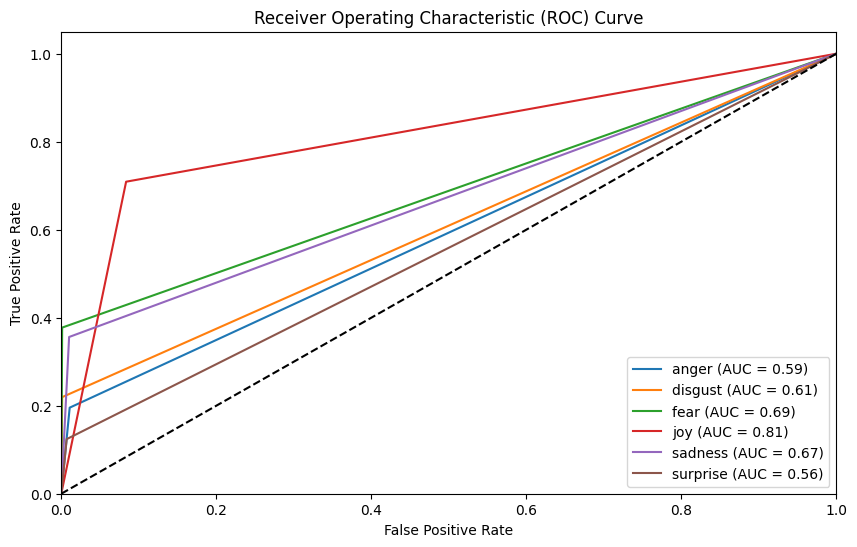

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate AUC for each class
auc_scores = roc_auc_score(y_test, y_pred, average=None)

# Plot AUC curve for each class
plt.figure(figsize=(10, 6))
for i, emotion in enumerate(emotions):
  fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'{emotion} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


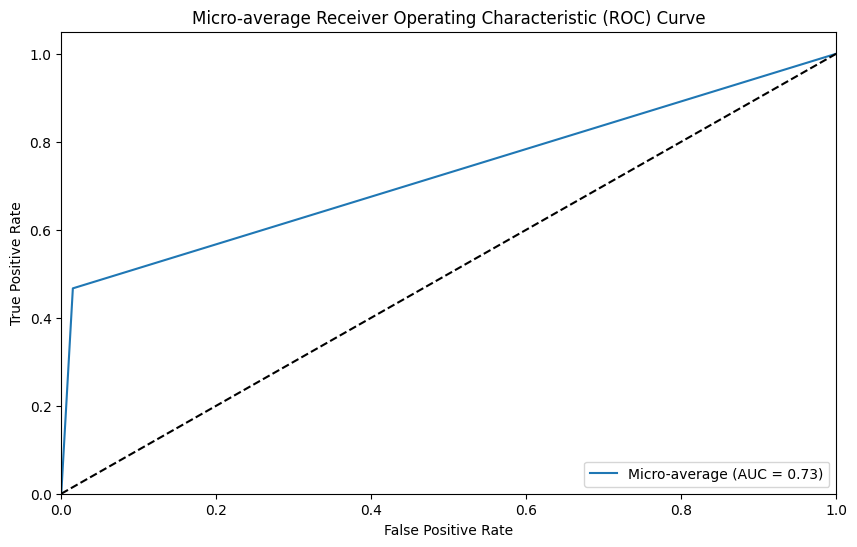

In [ ]:
# prompt: so upper cell shows emotions seperately, can you give me a graph showin AUC just graph i mean general

# Calculate micro-average AUC
micro_avg_auc = roc_auc_score(y_test, y_pred, average='micro')

# Plot micro-average AUC curve
plt.figure(figsize=(10, 6))
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, label=f'Micro-average (AUC = {micro_avg_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Roberta

In [30]:
from transformers import pipeline, RobertaForSequenceClassification, DistilBertForSequenceClassification, TFRobertaModel, RobertaTokenizer, DistilBertTokenizer, Trainer, TrainingArguments

In [31]:
from datasets import Dataset, DatasetDict, Features, ClassLabel, Sequence, Value, load_metric

In [31]:
import transformers

print(transformers.__version__)

4.42.4


In [32]:
import torch

In [33]:
from huggingface_hub import notebook_login

notebook_login()

In [34]:
!apt install git-lfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [35]:
from transformers.utils import send_example_telemetry

send_example_telemetry("token_classification_notebook", framework="pytorch")

In [65]:
# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

In [66]:
# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", max_length=128, truncation=True)

In [67]:
# Convert dataframes to datasets
train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_valid)
test_dataset = Dataset.from_pandas(df_test)


In [ ]:
print(train_dataset[0]['text'])

favourite food anything cook


In [68]:
# Apply tokenization
tokenized_train_dataset  = train_dataset.map(tokenize_function, batched=True)
tokenized_valid_dataset  = val_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset  = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_train_dataset[0]['text'])

favourite food anything cook


In [69]:
# Format labels for multi-label classification new
def format_labels(examples):
    labels = np.array([
        [
            float(examples["anger"][i]),
            float(examples["disgust"][i]),
            float(examples["fear"][i]),
            float(examples["joy"][i]),
            float(examples["sadness"][i]),
            float(examples["surprise"][i])
        ]
        for i in range(len(examples["text"]))
    ])
    return {"labels": labels}

In [70]:
# Apply the format_labels function to the datasets
formatted_train_dataset = tokenized_train_dataset.map(format_labels, batched=True)
formatted_valid_dataset = tokenized_valid_dataset.map(format_labels, batched=True)
formatted_test_dataset = tokenized_test_dataset.map(format_labels, batched=True)

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [71]:
# Remove columns that are not needed
train_dataset_final = formatted_train_dataset.remove_columns(['text', 'anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])
val_dataset_final = formatted_valid_dataset.remove_columns(['text', 'anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])
test_dataset_final = formatted_test_dataset.remove_columns(['text', 'anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])

In [72]:
# Set the format for PyTorch
train_dataset_final.set_format(type='torch')
val_dataset_final.set_format(type='torch')
test_dataset_final.set_format(type='torch')

In [73]:
# Load the model
model = DistilBertForSequenceClassification.from_pretrained('distilroberta-base', num_labels=6)
model.config.problem_type = "multi_label_classification"

You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'transformer.layer.0.attention.k_lin.bias', 'transformer.layer.0.attention.k_lin.weight', 'transformer.layer.0.attention.out_lin.bias', 'transformer.layer.0.attention.out_lin.weight', 'transformer.layer.0.attention.q_lin.bias', 'transformer.layer.0.attention.q_lin.weight', 'transformer.layer.0.attention.v_lin.bias', 'transformer.layer.0.attention.v_lin.weight', 'transformer.layer.0.ffn.lin1.bias', 'transformer.layer.0.ffn.lin1.weight', 'transformer.layer.0.ffn.lin2.bias', 'transformer.layer.0.ffn.lin2.weight', 'transformer.layer.0.output_layer_norm.bias', 'transformer.layer.0.output_layer_norm.weight', 'transformer.la

In [74]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    fp16=True
)

In [75]:
# Define the metric
def compute_metrics(p):
    metric = load_metric("accuracy")
    predictions = torch.sigmoid(torch.tensor(p.predictions)).numpy()
    preds = (predictions > 0.5).astype(int)
    # Convert predictions and references to lists of single values
    preds_flat = preds.flatten().tolist()  # Flatten and convert to list
    references_flat = p.label_ids.flatten().tolist()  # Assuming p.label_ids is also a NumPy array
    return metric.compute(predictions=preds_flat, references=references_flat)

In [76]:
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_final,
    eval_dataset=val_dataset_final,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

In [77]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.251900,0.240167,0.912858
2,0.219100,0.227568,0.916114
3,0.195300,0.222929,0.916022
4,0.181300,0.230773,0.914916


TrainOutput(global_step=10856, training_loss=0.21863051803127842, metrics={'train_runtime': 987.7993, 'train_samples_per_second': 175.785, 'train_steps_per_second': 10.99, 'total_flos': 5750819977236480.0, 'train_loss': 0.21863051803127842, 'epoch': 4.0})

In [78]:
# Evaluate the model
results = trainer.evaluate(test_dataset_final)
print(results)

{'eval_loss': 0.23452453315258026, 'eval_accuracy': 0.9153307536392113, 'eval_runtime': 7.6149, 'eval_samples_per_second': 712.679, 'eval_steps_per_second': 44.649, 'epoch': 4.0}


In [79]:
# Evaluate the model
predictions, labels, _ = trainer.predict(formatted_test_dataset)
predictions = torch.sigmoid(torch.tensor(predictions)).numpy()

In [80]:
# Calculate ROC AUC and plot ROC curves
label_names = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
num_labels = len(label_names)
fpr = {}
tpr = {}
roc_auc = {}

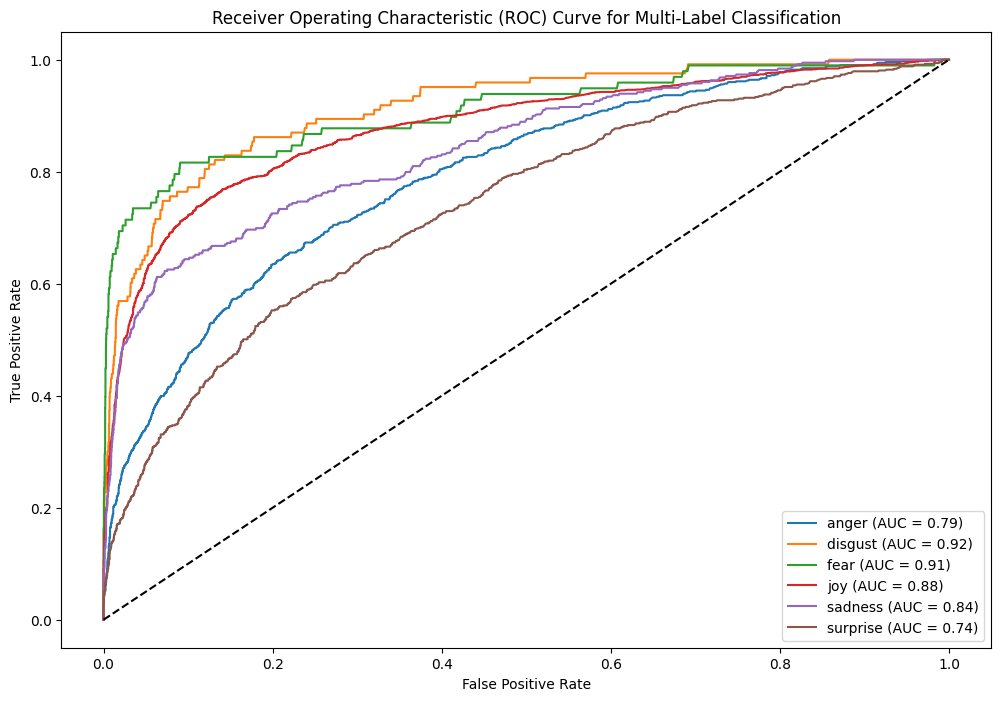

In [81]:
plt.figure(figsize=(12, 8))

for i, label_name in enumerate(label_names):
    fpr[i], tpr[i], _ = roc_curve(labels[:, i], predictions[:, i])
    roc_auc[i] = roc_auc_score(labels[:, i], predictions[:, i])
    plt.plot(fpr[i], tpr[i], label=f'{label_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Label Classification')
plt.legend(loc='lower right')
plt.show()

In [82]:
# Evaluate the model
predictions, labels, _ = trainer.predict(test_dataset_final)
predictions = torch.sigmoid(torch.tensor(predictions)).numpy()

In [83]:
# Calculate AUC for each label
auc_scores = []
for i in range(labels.shape[1]):
    auc = roc_auc_score(labels[:, i], predictions[:, i])
    auc_scores.append(auc)

In [84]:
# Calculate the average AUC
average_auc = np.mean(auc_scores)
print(f"Average AUC: {average_auc}")

Average AUC: 0.8465447314513376


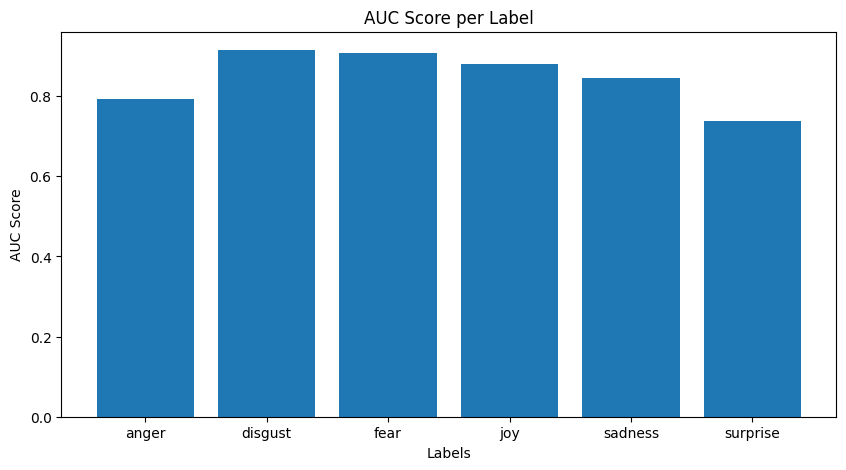

In [85]:
# Plot AUC scores
plt.figure(figsize=(10, 5))
plt.bar(range(len(auc_scores)), auc_scores, tick_label=['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])
plt.xlabel('Labels')
plt.ylabel('AUC Score')
plt.title('AUC Score per Label')
plt.show()

In [86]:
# Save model to drive
trainer.save_model("/content/drive/My Drive/RobertaModel")

In [87]:
# Replace these with your actual model and tokenizer
model = trainer.model
tokenizer = trainer.tokenizer

In [88]:
# Choose a model name for the Hugging Face Hub
model_name = "roberta-emotion"

In [89]:
# Push the model and tokenizer to the Hub
model.push_to_hub(model_name)
tokenizer.push_to_hub(model_name)

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/barx2os/roberta-emotion/commit/ca3153133681faf8bb4cd55a9144c37c73937e70', commit_message='Upload tokenizer', commit_description='', oid='ca3153133681faf8bb4cd55a9144c37c73937e70', pr_url=None, pr_revision=None, pr_num=None)

# Electra

In [36]:
from transformers import ElectraForSequenceClassification, ElectraTokenizer

In [37]:
tokenizer = ElectraTokenizer.from_pretrained("google/electra-base-discriminator")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

In [38]:
model = ElectraForSequenceClassification.from_pretrained("google/electra-base-discriminator", num_labels=6 )

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
model.config.problem_type = "multi_label_classification"

In [40]:
# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", max_length=128, truncation=True)

In [41]:
# Convert dataframes to datasets
train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_valid)
test_dataset = Dataset.from_pandas(df_test)


In [42]:
# Apply tokenization
tokenized_train_dataset  = train_dataset.map(tokenize_function, batched=True)
tokenized_valid_dataset  = val_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset  = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [43]:
# Format labels for multi-label classification new
def format_labels(examples):
    labels = np.array([
        [
            float(examples["anger"][i]),
            float(examples["disgust"][i]),
            float(examples["fear"][i]),
            float(examples["joy"][i]),
            float(examples["sadness"][i]),
            float(examples["surprise"][i])
        ]
        for i in range(len(examples["text"]))
    ])
    return {"labels": labels}

In [44]:
# Apply the format_labels function to the datasets
formatted_train_dataset = tokenized_train_dataset.map(format_labels, batched=True)
formatted_valid_dataset = tokenized_valid_dataset.map(format_labels, batched=True)
formatted_test_dataset = tokenized_test_dataset.map(format_labels, batched=True)

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [45]:
# Remove columns that are not needed
train_dataset_final = formatted_train_dataset.remove_columns(['text', 'anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])
val_dataset_final = formatted_valid_dataset.remove_columns(['text', 'anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])
test_dataset_final = formatted_test_dataset.remove_columns(['text', 'anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])

In [46]:
# Set the format for PyTorch
train_dataset_final.set_format(type='torch')
val_dataset_final.set_format(type='torch')
test_dataset_final.set_format(type='torch')

In [47]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    fp16=True
)

In [48]:
# Define the metric
def compute_metrics(p):
    metric = load_metric("accuracy")
    predictions = torch.sigmoid(torch.tensor(p.predictions)).numpy()
    preds = (predictions > 0.5).astype(int)
    # Convert predictions and references to lists of single values
    preds_flat = preds.flatten().tolist()  # Flatten and convert to list
    references_flat = p.label_ids.flatten().tolist()  # Assuming p.label_ids is also a NumPy array
    return metric.compute(predictions=preds_flat, references=references_flat)

In [49]:
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_final,
    eval_dataset=val_dataset_final,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

In [50]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.217200,0.205120,0.923455
2,0.191900,0.201819,0.924100
3,0.172100,0.202593,0.922871
4,0.162300,0.210130,0.921274


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


TrainOutput(global_step=10856, training_loss=0.19506525308135333, metrics={'train_runtime': 1794.7828, 'train_samples_per_second': 96.747, 'train_steps_per_second': 6.049, 'total_flos': 1.142206111475712e+16, 'train_loss': 0.19506525308135333, 'epoch': 4.0})

In [51]:
# Evaluate the model
results = trainer.evaluate(test_dataset_final)
print(results)

{'eval_loss': 0.21676619350910187, 'eval_accuracy': 0.9197837970640624, 'eval_runtime': 13.5878, 'eval_samples_per_second': 399.402, 'eval_steps_per_second': 25.022, 'epoch': 4.0}


In [52]:
# Evaluate the model
predictions, labels, _ = trainer.predict(formatted_test_dataset)
predictions = torch.sigmoid(torch.tensor(predictions)).numpy()

In [53]:
# Calculate ROC AUC and plot ROC curves
label_names = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
num_labels = len(label_names)
fpr = {}
tpr = {}
roc_auc = {}

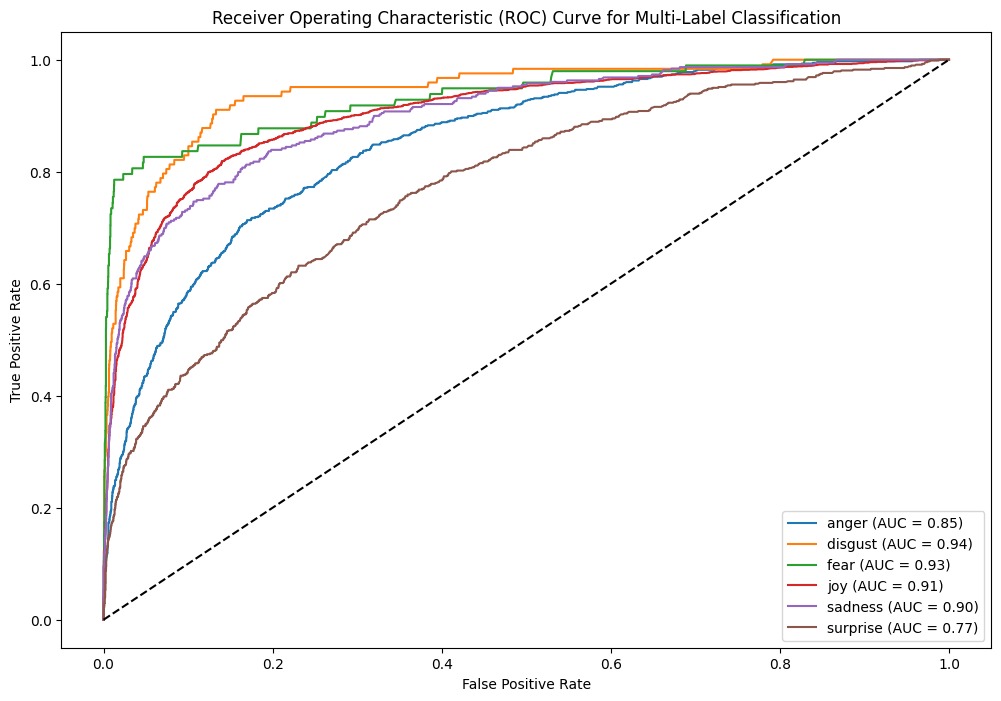

In [56]:
plt.figure(figsize=(12, 8))

for i, label_name in enumerate(label_names):
    fpr[i], tpr[i], _ = roc_curve(labels[:, i], predictions[:, i])
    roc_auc[i] = roc_auc_score(labels[:, i], predictions[:, i])
    plt.plot(fpr[i], tpr[i], label=f'{label_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Label Classification')
plt.legend(loc='lower right')
plt.show()

In [57]:
# Evaluate the model
predictions, labels, _ = trainer.predict(test_dataset_final)
predictions = torch.sigmoid(torch.tensor(predictions)).numpy()

In [58]:
# Calculate AUC for each label
auc_scores = []
for i in range(labels.shape[1]):
    auc = roc_auc_score(labels[:, i], predictions[:, i])
    auc_scores.append(auc)

In [59]:
# Calculate the average AUC
average_auc = np.mean(auc_scores)
print(f"Average AUC: {average_auc}")

Average AUC: 0.8852423354650941


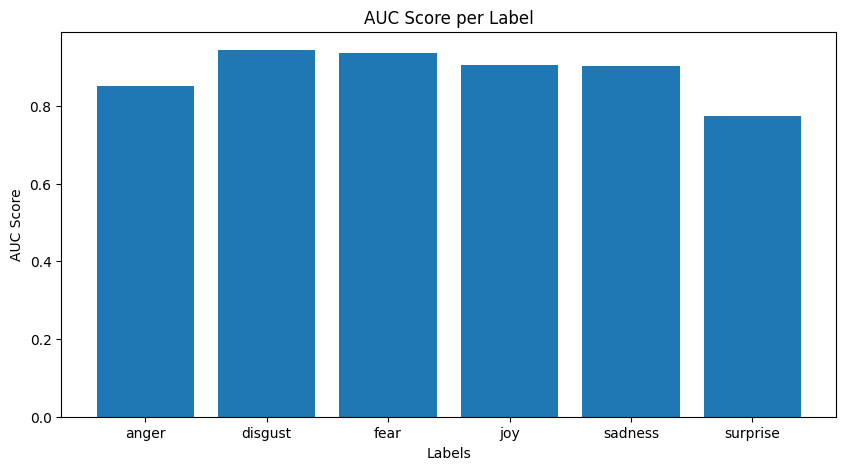

In [60]:
# Plot AUC scores
plt.figure(figsize=(10, 5))
plt.bar(range(len(auc_scores)), auc_scores, tick_label=['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])
plt.xlabel('Labels')
plt.ylabel('AUC Score')
plt.title('AUC Score per Label')
plt.show()

In [61]:
# Save model to drive
trainer.save_model("/content/drive/My Drive/ElectraModel")

In [63]:
# Replace these with your actual model and tokenizer
model = trainer.model
tokenizer = trainer.tokenizer

In [62]:
# Choose a model name for the Hugging Face Hub
model_name = "electra-emotion"

In [64]:
# Push the model and tokenizer to the Hub
model.push_to_hub(model_name)
tokenizer.push_to_hub(model_name)

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/barx2os/electra-emotion/commit/d2573e6f3ff7aa3e89e263a208ed559d0c55fd48', commit_message='Upload tokenizer', commit_description='', oid='d2573e6f3ff7aa3e89e263a208ed559d0c55fd48', pr_url=None, pr_revision=None, pr_num=None)